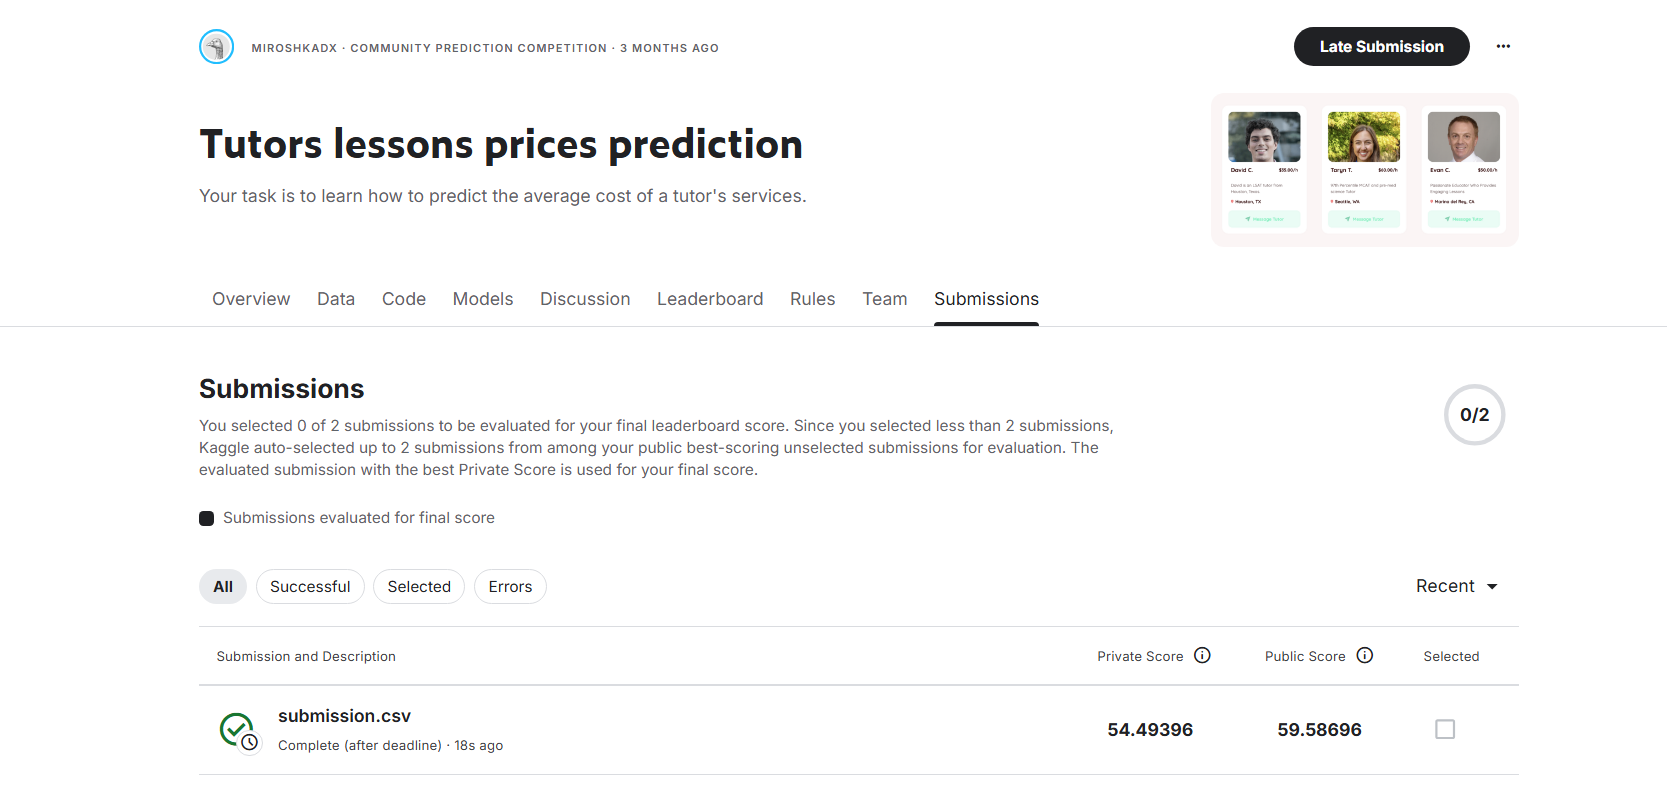

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error
import warnings
warnings.filterwarnings('ignore')

train = pd.read_excel('./train.xlsx')
test = pd.read_excel('./test.xlsx')

In [128]:
train.head()

,Unnamed: 0,предмет,ФИО,tutor_head_tags,tutor_rating,tutor_reviews,description,experience_desc,Education_1,Desc_Education_1,...,status,experience,Desc_Education_5,Desc_Education_6,Education_5,Education_6,Ученая степень 2,Ученое звание 2,categories,mean_price
0,0,matematika,Репетитор по математике Емельянова Марина Вла...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",5.0,2,Репетитор не предоставил о себе дополн...,NaN,Томский государственный университет им. В.В. ...,"Год окончания: 1990, Факультет: механико-мате...",...,Университетский преподаватель,31 год,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",16.666667
1,1,matematika,Репетитор по математике Назарова Анастасия Ан...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",4.0,7,Репетитор не предоставил о себе дополн...,NaN,Вологодский государственный педагогический ун...,"Год окончания: 2017, Факультет: факультет при...",...,Школьный преподаватель,8 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",11.666667
2,2,informatika,Репетитор по информатике Мотроненко Инна Конст...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",0.0,0,"Выезд за город: Балашиха-1, Балашиха-2...",Московская Школа (учитель ...,Московский городской педагогический университет,"Год окончания: 2008, Факультет: Математически...",...,Школьный преподаватель,11 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",23.333333
3,3,matematika,Репетитор по математике Логинова Елизавета Ал...,"['Школьная программа', 'Математический анализ'...",4.0,19,"Здравствуйте! Меня зовут Елизавета, о...",NaN,Санкт-Петербургский государственный университет,"Год окончания: 2021, Факультет: физический фа...",...,Частный преподаватель,5 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 1 по 4 класс', 'Школьники с 5 по...",0.116667
4,4,matematika,Репетитор по математике Харланов Олег Викторо...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",0.0,0,"Целеустремленный, ориентирован на резу...",преподавателем ...,Приазовский государственный технический униве...,"Год окончания: 2005, Факультет: Энергетически...",...,Частный преподаватель,19 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",16.666667


In [129]:
test.head()

,Unnamed: 0,предмет,ФИО,tutor_head_tags,tutor_rating,tutor_reviews,description,experience_desc,Education_1,Desc_Education_1,...,Ученое звание 1,status,experience,Desc_Education_5,Desc_Education_6,Education_5,Education_6,Ученая степень 2,Ученое звание 2,categories
0,0,matematika,Репетитор по математике Тихонова Наталья Бори...,"['Школьная программа', 'Подготовка к ЕГЭ', 'Ан...",4,13,Дистанционное убучение по Skype с прим...,NaN,Петрозаводский государственный университет,"Год окончания: 1981, Факультет: физико-матема...",...,NaN,Частный преподаватель,26 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п..."
1,1,matematika,Репетитор по математике Худайбердина Милана Р...,"['Школьная программа', 'Математический анализ'...",0,0,Буду рада помочь в освоении дисциплин ...,NaN,"Национальный исследовательский университет ""В...","Год окончания: 2022, Факультет: Московский ин...",...,NaN,Студент,4 года,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п..."
2,2,matematika,Репетитор по математике Епихина Елена Вячесла...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",0,0,Преподаватель высшей квалификационный ...,Репетитор не предоставил информаци...,"Тамбовский ордена ""Знак Почёта"" государственн...","Год окончания: 1987, Факультет: Математика, С...",...,NaN,"Университетский преподаватель, Школьный препо...",36 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 10 по 11 класс, студенты колледж..."
3,3,matematika,Репетитор по математике Касаткин Денис Евгень...,"['Школьная программа', 'Подготовка к ОГЭ', 'Hi...",4,11,"Объясняю ровно столько, сколько надо. ...",NaN,Тюменский государственный университет,"Год окончания: 2022, Факультет: факультет меж...",...,NaN,Студент,3 года,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 1 по 4 класс', 'Школьники с 5 по..."
4,4,informatika,Репетитор по информатике Логвинов Артём Алекса...,['Подготовка к ЕГЭ'],0,0,"Подготовлю к ЕГЭ, уроки через любую уд...",Репетитор не предоставил информаци...,РТУ МИРЭА,"Год окончания: 2026, Факультет: Программная и...",...,NaN,Студент,1 год,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 10 по 11 класс, студенты колледж..."


In [130]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4548 entries, 0 to 4547
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        4548 non-null   int64  
 1   предмет           4548 non-null   object 
 2   ФИО               4548 non-null   object 
 3   tutor_head_tags   4548 non-null   object 
 4   tutor_rating      3959 non-null   float64
 5   tutor_reviews     4548 non-null   int64  
 6   description       4547 non-null   object 
 7   experience_desc   2171 non-null   object 
 8   Education_1       4548 non-null   object 
 9   Desc_Education_1  4472 non-null   object 
 10  Education_2       781 non-null    object 
 11  Desc_Education_2  777 non-null    object 
 12  Education_3       106 non-null    object 
 13  Desc_Education_3  105 non-null    object 
 14  Education_4       16 non-null     object 
 15  Desc_Education_4  16 non-null     object 
 16  Ученая степень 1  76 non-null     object 


In [131]:
train.isnull().sum()

Unnamed: 0             0
предмет                0
ФИО                    0
tutor_head_tags        0
tutor_rating         589
tutor_reviews          0
description            1
experience_desc     2377
Education_1            0
Desc_Education_1      76
Education_2         3767
Desc_Education_2    3771
Education_3         4442
Desc_Education_3    4443
Education_4         4532
Desc_Education_4    4532
Ученая степень 1    4472
Ученое звание 1     4513
status                13
experience            25
Desc_Education_5    4545
Desc_Education_6    4547
Education_5         4545
Education_6         4547
Ученая степень 2    4547
Ученое звание 2     4547
categories             0
mean_price             0
dtype: int64

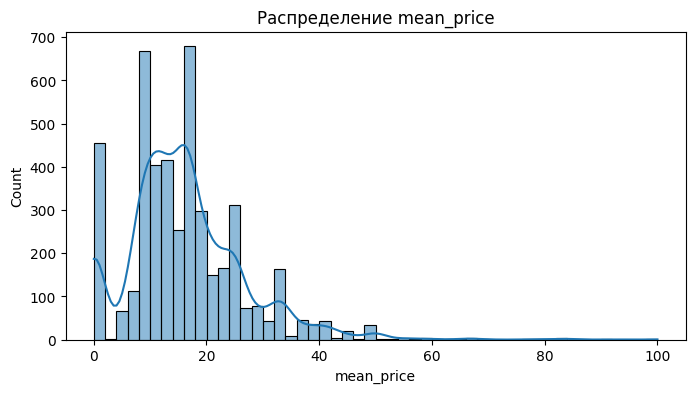

In [132]:
plt.figure(figsize=(8, 4))
sns.histplot(train['mean_price'], bins=50, kde=True)
plt.title('Распределение mean_price')
plt.xlabel('mean_price')
plt.ylabel('Count')
plt.show()

In [133]:
print('Уникальные значения предмет:\n', train['предмет'].unique())
print('#'*80)
print('Уникальные значения status:\n', train['status'].unique())
print('#'*80)
print('Уникальные значения experience:\n', train['experience'].unique())

Уникальные значения предмет:
 ['matematika' 'informatika']
################################################################################
Уникальные значения status:
 [' Университетский преподаватель' ' Школьный преподаватель'
 ' Частный преподаватель' ' Студент'
 ' Аспирант или ординатор очной формы обучения' nan
 ' Университетский преподаватель, Школьный преподаватель'
 ' Аспирант или ординатор очной формы обучения, Частный преподаватель'
 ' Частный преподаватель, Студент'
 ' Университетский преподаватель, Аспирант или ординатор очной формы обучения'
 ' Школьный преподаватель, Аспирант или ординатор очной формы обучения']
################################################################################
Уникальные значения experience:
 [' 31 год ' ' 8 лет ' ' 11 лет ' ' 5 лет ' ' 19 лет ' ' 7 лет ' ' 27 лет '
 ' 9 лет ' ' 38 лет ' ' 28 лет ' ' 17 лет ' ' 6 лет ' ' 13 лет '
 ' 45 лет ' ' 4 года ' ' 3 года ' ' 10 лет ' ' 2 года ' ' 14 лет '
 ' 20 лет ' ' 18 лет ' ' 32 года ' ' 16 лет '

In [134]:
for col in ['tutor_rating', 'tutor_reviews']:
    train[col] = train[col].fillna(train[col].median())
    test[col] = test[col].fillna(train[col].median())

for col in ['experience', 'status']:
    train[col] = train[col].fillna('unknown')
    test[col] = test[col].fillna('unknown')

for col in ['description']:
    train[col] = train[col].fillna('')
    test[col] = test[col].fillna('')

In [ ]:
def extract_years(experience_value):
    """
    Возврат лет опыта из строки или числа.

    """
    if pd.isna(experience_value):  # Обработка пропущенных значений
        return 0
    if isinstance(experience_value, str):
        digits = "".join([char for char in experience_value if char.isdigit()])
        return int(digits) if digits else 0
    return int(experience_value)


# Создаем признак "Опыт работы"
train["experience_years"] = train["experience"].apply(extract_experience_years)
test["experience_years"] = test["experience"].apply(extract_experience_years)

# Создаем признак "Длина описания профиля"
train["profile_description_length"] = train["description"].str.len().fillna(0)
test["profile_description_length"] = test["description"].str.len().fillna(0)

# Создаем признак "Количество специализаций"
train["specializations_count"] = train["tutor_head_tags"].apply(
    lambda tags: len(eval(tags)) if pd.notna(tags) else 0
)
test["specializations_count"] = test["tutor_head_tags"].apply(
    lambda tags: len(eval(tags)) if pd.notna(tags) else 0
)

# Создаем признак "Количество категорий учеников"
train["student_categories_count"] = train["categories"].apply(
    lambda cats: len(eval(cats)) if pd.notna(cats) else 0
)
test["student_categories_count"] = test["categories"].apply(
    lambda cats: len(eval(cats)) if pd.notna(cats) else 0
)

In [ ]:
# Кодирование категориальных признаков
all_status = pd.concat([train['status'], test['status']]).astype(str)
le_status = LabelEncoder()
le_status.fit(all_status)
train['status_enc'] = le_status.transform(train['status'].astype(str))
test['status_enc'] = le_status.transform(test['status'].astype(str))

all_subjects = pd.concat([train['предмет'], test['предмет']]).astype(str)
le_subject = LabelEncoder()
le_subject.fit(all_subjects)
train['subject_enc'] = le_subject.transform(train['предмет'].astype(str))
test['subject_enc'] = le_subject.transform(test['предмет'].astype(str))

# Список используемых признаков с новыми именами
features = [
    'tutor_rating',
    'tutor_reviews',
    'experience_years',
    'subject_enc',
    'status_enc',
    'profile_description_length',  # Было desc_len
    'specializations_count',      # Было n_tags
    'student_categories_count'    # Было n_categories
]

# Формирование матриц признаков
X = train[features]
y = train['mean_price'].astype(float)
X_test = test[features]

In [137]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

In [138]:
final_model = RandomForestRegressor(**grid.best_params_, random_state=42)
final_model.fit(X_scaled, y)

# Предсказания для тестового набора
preds = final_model.predict(X_test_scaled)

# Формирование submission для Kaggle
submission = pd.DataFrame({'index': test['Unnamed: 0'], 'mean_price': preds})
submission.to_csv('submission.csv', index=False)

In [ ]:
# train для локальной оценки
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Модель с оптимизацией по MSE
rf_mse = RandomForestRegressor(random_state=42)
rf_mse.fit(X_train, y_train)
y_pred_mse = rf_mse.predict(X_val)
print('MSE на валидации:', mean_squared_error(y_val, y_pred_mse))
print('RMSE на валидации:', np.sqrt(mean_squared_error(y_val, y_pred_mse)))
print('MAE на валидации:', mean_absolute_error(y_val, y_pred_mse))

# гиперпараметры для MSE
param_grid = {
    'n_estimators': [200, 400],
    'max_depth': [10, 20, None]
}
grid_mse = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=3,
    scoring='neg_mean_squared_error'  # Оптимизируем по MSE
)
grid_mse.fit(X_train, y_train)
print('#'*80)
print('Лучшие параметры для MSE:', grid_mse.best_params_)
print('MSE на валидации:', mean_squared_error(y_val, grid_mse.predict(X_val)))
print('RMSE на валидации:', np.sqrt(mean_squared_error(y_val, grid_mse.predict(X_val))))
print('MAE на валидации:', mean_absolute_error(y_val, grid_mse.predict(X_val)))

# Финальная модель с лучшими параметрами
final_model_mse = RandomForestRegressor(**grid_mse.best_params_, random_state=42)
final_model_mse.fit(X_scaled, y)

preds_mse = final_model_mse.predict(X_test_scaled)

# Формирование submission для Kaggle
submission_mse = pd.DataFrame({'index': test['Unnamed: 0'], 'mean_price': preds_mse})
submission_mse.to_csv('submission_models.csv', index=False)

MSE на валидации: 98.1904210655362
RMSE на валидации: 9.90910798536055
MAE на валидации: 6.418669209949411
################################################################################
Лучшие параметры для MSE: {'max_depth': 10, 'n_estimators': 400}
MSE на валидации: 95.55016766269941
RMSE на валидации: 9.7749766067597
MAE на валидации: 6.3992857342706415
